In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dictionary of data:
| variable   |      Definition      |  Key |
|----------|:-------------:|------:|
| survival |  Survival| 0 = No, 1 = Yes |
| pclass|    Ticket class   |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |    |
| sibsp |  # of siblings / spouses aboard the Titanic | |
| Age|    Age in years  |    |
| parch | # of parents / children aboard the Titanic|   |    
| ticket |  Ticket number |  |
| fare|    Passenger fare   |   |
| cabin | Cabin number|     |   
| embarked | Port of Embarkation |    C = Cherbourg, Q = Queenstown, S = Southampton |

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
train['Age'] = train['Age'].fillna(train['Age'].mean())


<Figure size 432x288 with 0 Axes>

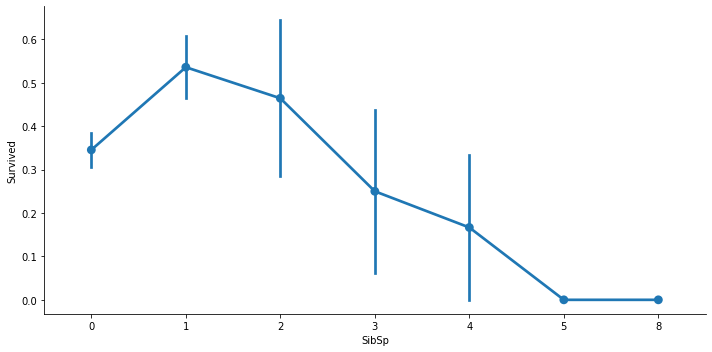

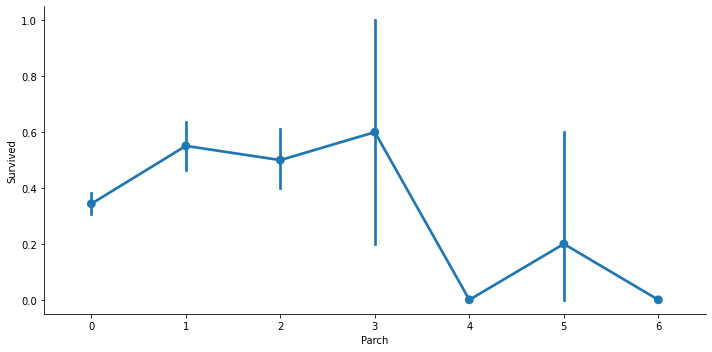

In [63]:
for i,col  in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=train, kind='point', aspect=2)

the image above shows that the more members a family has, lower is the chance of an individual surviving.

In [64]:
train['FamilySize'] = train['SibSp'] + train['Parch']

In [65]:
train = train.drop(['PassengerId', 'SibSp', 'Parch'], axis=1)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   Ticket      891 non-null    object 
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Embarked    889 non-null    object 
 9   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [67]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
dtype: int64

In [68]:
train.groupby(train['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [69]:
train['Cabin_indicator'] = np.where(train['Cabin'].isnull(), 0, 1)

In [70]:
train['Sex'] = np.where(train['Sex']=='male',0,1)

In [71]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Cabin_indicator
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [72]:
train_result = train['Survived']

In [73]:
train = train.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1)

In [74]:
from sklearn.model_selection import train_test_split

features = train.drop('Survived', axis=1)
labels = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [75]:
train = train.drop(['Survived'], axis=1)
train

,Pclass,Sex,Age,Fare,FamilySize,Cabin_indicator
0,3,0,22.000000,7.2500,1,0
1,1,1,38.000000,71.2833,1,1
2,3,1,26.000000,7.9250,0,0
3,1,1,35.000000,53.1000,1,1
4,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,13.0000,0,0
887,1,1,19.000000,30.0000,0,1
888,3,1,29.699118,23.4500,3,0
889,1,0,26.000000,30.0000,0,1


In [76]:
def print_results(results):
    print(f'BEST PARAMS: {results.best_params_}\n')

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import joblib

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv = 5)
cv.fit(train, train_result.values.ravel())

print_results(cv)
joblib.dump(cv.best_estimator_,'LR_model.pkl')


BEST PARAMS: {'C': 1}

0.68 (+/-0.077) for {'C': 0.001}
0.737 (+/-0.065) for {'C': 0.01}
0.79 (+/-0.043) for {'C': 0.1}
0.801 (+/-0.026) for {'C': 1}
0.799 (+/-0.025) for {'C': 10}
0.799 (+/-0.025) for {'C': 100}
0.799 (+/-0.025) for {'C': 1000}


c:\Users\Saulo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LR_model.pkl']

In [78]:
from sklearn.svm import SVC

svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1,1,10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(train, train_result.values.ravel())

print_results(cv)
joblib.dump(cv.best_estimator_,'SVM_model.pkl')


BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.787 (+/-0.037) for {'C': 0.1, 'kernel': 'linear'}
0.666 (+/-0.092) for {'C': 0.1, 'kernel': 'rbf'}
0.788 (+/-0.04) for {'C': 1, 'kernel': 'linear'}
0.672 (+/-0.088) for {'C': 1, 'kernel': 'rbf'}
0.788 (+/-0.04) for {'C': 10, 'kernel': 'linear'}
0.709 (+/-0.105) for {'C': 10, 'kernel': 'rbf'}


['SVM_model.pkl']

In [79]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(train, train_result.values.ravel())

print_results(cv)
joblib.dump(cv.best_estimator_,'MLP_model.pkl')

c:\Users\Saulo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Saulo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Saulo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Saulo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}

0.755 (+/-0.101) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.764 (+/-0.084) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.757 (+/-0.109) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.792 (+/-0.029) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.802 (+/-0.014) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.791 (+/-0.034) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.788 (+/-0.034) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.794 (+/-0.031) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.792 (+/-0.02) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learn

['MLP_model.pkl']

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2,4,8,16,32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train, train_result.values.ravel())

print_results(cv)
joblib.dump(cv.best_estimator_,'RF_model.pkl')

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.76 (+/-0.108) for {'max_depth': 2, 'n_estimators': 5}
0.786 (+/-0.09) for {'max_depth': 2, 'n_estimators': 50}
0.79 (+/-0.071) for {'max_depth': 2, 'n_estimators': 250}
0.799 (+/-0.038) for {'max_depth': 4, 'n_estimators': 5}
0.805 (+/-0.059) for {'max_depth': 4, 'n_estimators': 50}
0.805 (+/-0.059) for {'max_depth': 4, 'n_estimators': 250}
0.81 (+/-0.051) for {'max_depth': 8, 'n_estimators': 5}
0.831 (+/-0.038) for {'max_depth': 8, 'n_estimators': 50}
0.834 (+/-0.047) for {'max_depth': 8, 'n_estimators': 250}
0.814 (+/-0.05) for {'max_depth': 16, 'n_estimators': 5}
0.822 (+/-0.068) for {'max_depth': 16, 'n_estimators': 50}
0.823 (+/-0.061) for {'max_depth': 16, 'n_estimators': 250}
0.823 (+/-0.048) for {'max_depth': 32, 'n_estimators': 5}
0.827 (+/-0.067) for {'max_depth': 32, 'n_estimators': 50}
0.82 (+/-0.07) for {'max_depth': 32, 'n_estimators': 250}
0.795 (+/-0.052) for {'max_depth': None, 'n_estimators': 5}
0.816 (+/-0.077) fo

['RF_model.pkl']

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5,50,250,500],
    'max_depth': [1,3,5,7,9],
    'learning_rate': [0.01,0.1,1,10,100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(train, train_result.values.ravel())

print_results(cv)
joblib.dump(cv.best_estimator_,'GB_model.pkl')

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.616 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.787 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.789 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.024) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.616 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.792 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.818 (+/-0.027) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.826 (+/-0.026) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.616 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.801 (+/-0.059) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.824 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.834 (+/-0.045) for {'learning_r

['GB_model.pkl']

In [82]:
models = {}
#for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load(f'{mdl}_model.pkl')

In [83]:
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'MLP': MLPClassifier(hidden_layer_sizes=(50,), learning_rate='invscaling'),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=250),
 'GB': GradientBoostingClassifier(n_estimators=250)}

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [85]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [87]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.787 / Precision: 0.721 / Recall: 0.677 / Latency: 1.0ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency: 2.0ms
MLP -- Accuracy: 0.77 / Precision: 0.682 / Recall: 0.692 / Latency: 1.0ms
RF -- Accuracy: 0.899 / Precision: 0.912 / Recall: 0.8 / Latency: 18.5ms
GB -- Accuracy: 0.91 / Precision: 0.902 / Recall: 0.846 / Latency: 2.0ms


In [88]:
evaluate_model('Random Forest', models['RF'], te_features, te_labels)

Random Forest -- Accuracy: 0.933 / Precision: 0.944 / Recall: 0.895 / Latency: 19.1ms


In [ ]:

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['FamilySize'] = test['SibSp'] + test['Parch']
test = test.drop(['PassengerId', 'SibSp', 'Parch'], axis=1)
test['Cabin_indicator'] = np.where(test['Cabin'].isnull(), 0, 1)
test['Sex'] = np.where(test['Sex']=='male',0,1)
test = test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1)
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test

In [105]:
test_ids = pd.read_csv('test.csv')['PassengerId']

In [103]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [250],
    'max_depth': [8]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train, train_result.values.ravel())

pred = cv.predict(test)

In [108]:
predicted = pd.DataFrame(pred, columns=['Survived'])
submission = pd.concat([test_ids, predicted], axis=1)
submission.to_csv('submission.csv', index=False)

In [107]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
